In [22]:
bank_path = "C:/Users/Familia/Desktop/DANI/Curso Data Analist/Phyton for data/data/bank-additional.csv"
customers_path = "C:/Users/Familia/Desktop/DANI/Curso Data Analist/Phyton for data/data/customer-details.xlsx"

import pandas as pd
import numpy as np

bank = pd.read_csv(bank_path, sep=",")
customer_sheets = pd.read_excel(customers_path, sheet_name=None)
customers = pd.concat(customer_sheets.values(), ignore_index=True)

print(bank.shape)
print(customers.shape)


(43000, 24)
(43170, 7)


In [23]:
print(bank.shape)
print(bank.head())
print(customers.shape)
print(customers.head())


(43000, 24)
   Unnamed: 0   age        job  marital    education  default  housing  loan  \
0           0   NaN  housemaid  MARRIED     basic.4y      0.0      0.0   0.0   
1           1  57.0   services  MARRIED  high.school      NaN      0.0   0.0   
2           2  37.0   services  MARRIED  high.school      0.0      1.0   0.0   
3           3  40.0     admin.  MARRIED     basic.6y      0.0      0.0   0.0   
4           4  56.0   services  MARRIED  high.school      0.0      0.0   1.0   

     contact  duration  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  telephone       261  ...           1.1          93,994          -36,4   
1  telephone       149  ...           1.1          93,994          -36,4   
2  telephone       226  ...           1.1          93,994          -36,4   
3  telephone       151  ...           1.1          93,994          -36,4   
4  telephone       307  ...           1.1          93,994          -36,4   

  euribor3m  nr.employed   y                date l

In [24]:
#Limpieza de los datos
# copias para trabajar
bank_clean = bank.copy()
customers_clean = customers.copy()

# eliminar duplicados
bank_clean = bank_clean.drop_duplicates()
customers_clean = customers_clean.drop_duplicates()

# convertir fechas
bank_clean['date'] = pd.to_datetime(bank_clean['date'], errors='coerce')
customers_clean['Dt_Customer'] = pd.to_datetime(customers_clean['Dt_Customer'], errors='coerce')

# eliminar columnas innecesarias (ejemplo)
if 'Unnamed: 0' in customers_clean.columns:
    customers_clean = customers_clean.drop(columns=['Unnamed: 0'])

# ver nulos
print(bank_clean.isna().sum())
print(customers_clean.isna().sum())


C:\Users\Familia\AppData\Local\Temp\ipykernel_15620\3258018129.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clean['date'] = pd.to_datetime(bank_clean['date'], errors='coerce')


Unnamed: 0            0
age                5120
job                 345
marital              85
education          1807
default            8981
housing            1026
loan               1026
contact               0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx      471
cons.conf.idx         0
euribor3m          9256
nr.employed           0
y                     0
date              43000
latitude              0
longitude             0
id_                   0
dtype: int64
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


In [26]:
bank_clean.describe(include='all')
bank_clean['job'].value_counts()
bank_clean['y'].value_counts(normalize=True) * 100  # tasa de conversión



y
no     88.734884
yes    11.265116
Name: proportion, dtype: float64

In [27]:
num_corr = bank_clean.corr(numeric_only=True)
print(num_corr)


              Unnamed: 0       age   default   housing      loan  duration  \
Unnamed: 0      1.000000  0.006825  0.000512  0.085736  0.005938  0.007864   
age             0.006825  1.000000  0.006932 -0.000502 -0.001017 -0.000073   
default         0.000512  0.006932  1.000000 -0.003952 -0.004094 -0.005620   
housing         0.085736 -0.000502 -0.003952  1.000000  0.045448 -0.008682   
loan            0.005938 -0.001017 -0.004094  0.045448  1.000000 -0.000924   
duration        0.007864 -0.000073 -0.005620 -0.008682 -0.000924  1.000000   
campaign       -0.095468  0.005374 -0.004109 -0.011045  0.004186 -0.071956   
pdays          -0.284532 -0.035639  0.002033 -0.009825 -0.000232 -0.047632   
previous        0.427965  0.024399  0.002327  0.019514 -0.000775  0.021285   
emp.var.rate   -0.835517 -0.002948  0.005725 -0.060096  0.001225 -0.027158   
latitude        0.004707  0.000796  0.000715 -0.001363 -0.000126 -0.004131   
longitude       0.000755  0.006360 -0.000270 -0.003269  0.000885

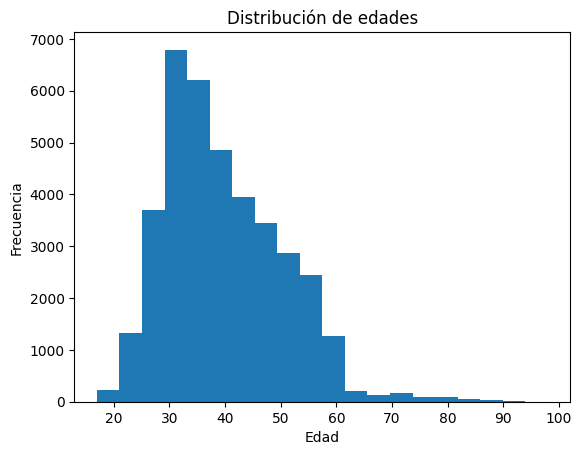

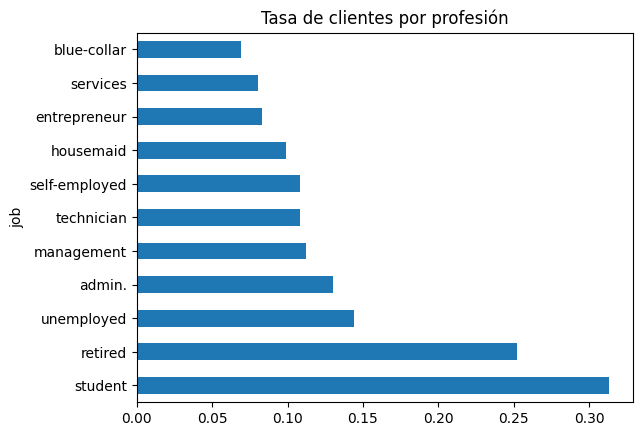

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(bank_clean['age'].dropna(), bins=20)
plt.title("Distribución de edades")
plt.xlabel("Edad"); plt.ylabel("Frecuencia")
plt.show()

# tasa de conversión por job
conv_by_job = bank_clean.groupby('job')['y'].apply(lambda s: (s=='yes').mean())
conv_by_job.sort_values(ascending=False).plot(kind='barh')
plt.title("Tasa de clientes por profesión")
plt.show()



In [33]:
# ejemplo: join left usando id_ del banco y ID del customers
merged = bank_clean.merge(customers_clean, left_on='id_', right_on='ID', how='left')
merged.shape


(43000, 30)

In [35]:
bank_clean.to_csv("C:/Users/Familia/Desktop/DANI/Curso Data Analist/Phyton for data/data/bank_clean.csv", index=False)
customers_clean.to_csv("C:/Users/Familia/Desktop/DANI/Curso Data Analist/Phyton for data/data/customers_combined.csv", index=False)
merged.to_csv("C:/Users/Familia/Desktop/DANI/Curso Data Analist/Phyton for data/data/merged.csv", index=False)  # si hiciste merge
